In [76]:
import os
import cv2
from pycocotools.coco import COCO
import numpy as np


def coco2masks(coco_annotation_file, images_directory, output_mask_directory,output_images_directory):
    coco = COCO(coco_annotation_file)
    image_ids = coco.getImgIds()

    if not os.path.exists(output_mask_directory):
        os.makedirs(output_mask_directory)
    if not os.path.exists(output_images_directory):
        os.makedirs(output_images_directory)

    for image_id in image_ids:
        img_info = coco.loadImgs(image_id)[0]
        image_filename = img_info['file_name']
        image_path = os.path.join(images_directory, image_filename)
        image = cv2.imread(image_path,cv2.IMREAD_COLOR)

        ann_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(ann_ids)
        sort = [j[1] for j in (sorted([(i['area'],i['id']) for i in annotations],reverse=True, key=lambda x: x[0]))]
        sorted_annotations = []
        for idsorted in sort:
            sorted_annotations.append(next(item for item in annotations if item["id"] == idsorted))

        class_map = np.zeros_like(image[:, :, 0], dtype=np.uint8)
        instance_map = np.zeros_like(image[:, :, 0], dtype=np.uint8)

        for idx, ann in enumerate(sorted_annotations):
            mask = coco.annToMask(ann)
            class_id = ann['category_id'] + 1
            instance_id = idx + 1  # Start instance IDs from 1

            class_map[mask > 0] = class_id
            instance_map[mask > 0] = instance_id

        output_filename = str(image_id)+ os.path.splitext(image_filename)[1]
        output_mask_path = os.path.join(output_mask_directory,str(image_id)+'.mask.png')
        output_image_path = os.path.join(output_images_directory, output_filename)

        mask_image = np.zeros_like(image, dtype=np.uint8)
        mask_image[:, :, 0] = class_map
        mask_image[:, :, 1] = instance_map

        cv2.imwrite(output_mask_path, cv2.cvtColor(mask_image, cv2.COLOR_RGB2BGR));print(output_mask_path)
        cv2.imwrite(output_image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR));print(output_image_path)
    print(image_ids)

In [ ]:
coco_path = "/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_val_data.json"
images_dir = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Val"
output_dir_mask = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Val/masks"
output_dir_img = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Val/images"
coco2masks(coco_path, images_dir, output_dir_mask, output_dir_img)

In [ ]:
coco_path = "/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_test_data.json"
images_dir = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Test"
output_dir_mask = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Test/masks"
output_dir_img = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Test/images"
coco2masks(coco_path, images_dir, output_dir_mask, output_dir_img)

In [ ]:
coco_path = "/content/drive/MyDrive/Thesis_Organized/Data/COCO_Format/coco_train_data.json"
images_dir = "/content/drive/MyDrive/Thesis_Organized/Data/Images_cropped/Train"
output_dir_mask = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Train/masks"
output_dir_img = "/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Train/images"
coco2masks(coco_path, images_dir, output_dir_mask, output_dir_img)

In [80]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open('/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Val/masks/3.mask.png')

# Convert the image to a NumPy array
image_array = np.array(image)

# Optionally, to handle RGBA to RGB if needed
if image_array.shape[-1] == 4:  # Has alpha channel
    # Convert RGBA to RGB
    image_array = image_array[..., :3]

In [81]:
image_array.shape

(517, 658, 3)

In [82]:
np.unique(image_array[:,:,0]), np.unique(image_array[:,:,1]), np.unique(image_array[:,:,2])

(array([0, 1], dtype=uint8),
 array([0, 1, 2, 3, 4], dtype=uint8),
 array([0], dtype=uint8))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
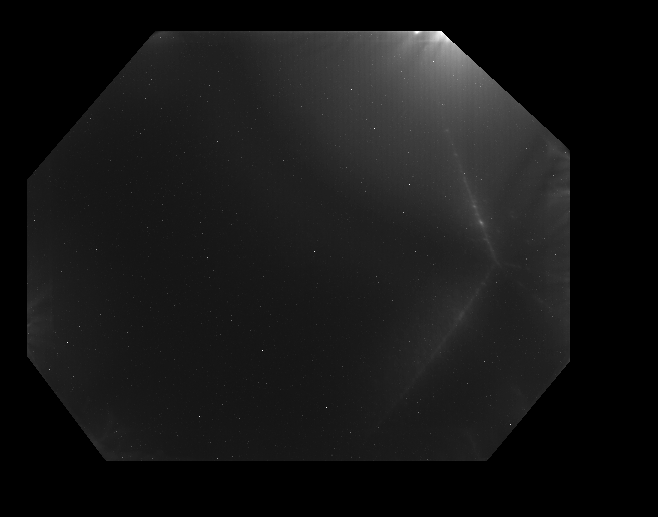

In [83]:
import cv2
image = cv2.imread('/content/drive/MyDrive/Thesis_Organized/Data/MaskFormer_data/Val/images/3.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb

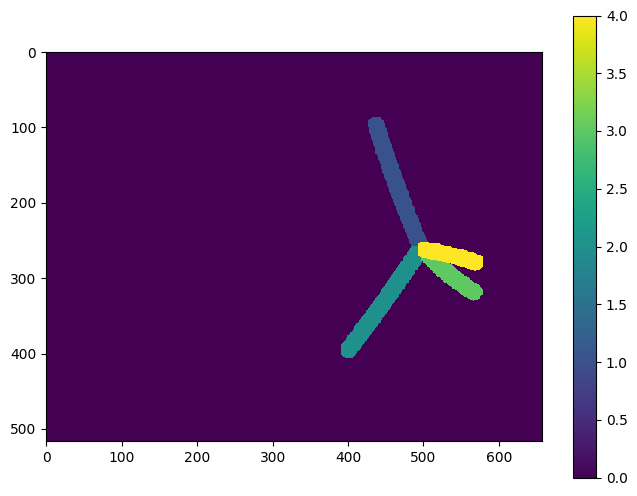

In [84]:
import numpy as np
import matplotlib.pyplot as plt


data = image_array[:,:,1]
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()

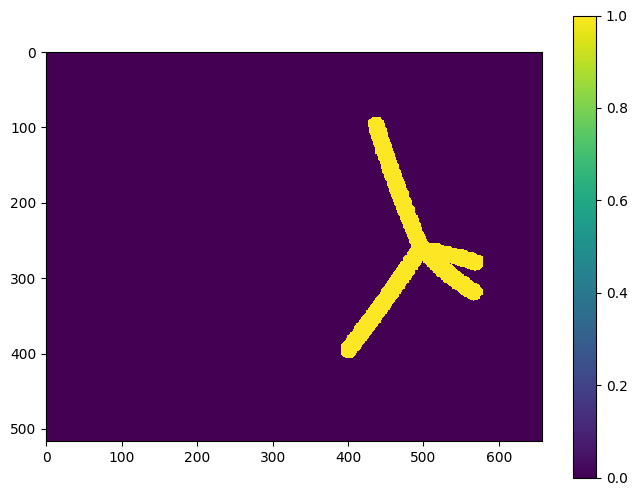

In [90]:
import numpy as np
import matplotlib.pyplot as plt


data = image_array[:,:,0]
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()

In [ ]:
!pip install datasets

In [86]:
from datasets import load_dataset
val = load_dataset("scene_parse_150", "instance_segmentation", split="validation")

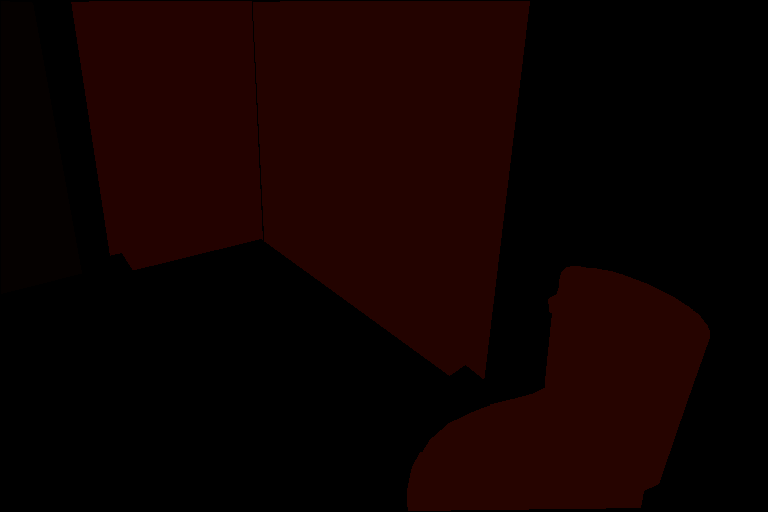

In [87]:
val[0]["annotation"]

In [88]:
import numpy as np

np.unique(np.array(val[0]["annotation"])[:,:,0]), np.unique(np.array(val[0]["annotation"])[:,:,1]), np.unique(np.array(val[0]["annotation"])[:,:,2])

(array([ 0,  5, 35, 38], dtype=uint8),
 array([0, 1, 2, 3, 4], dtype=uint8),
 array([0], dtype=uint8))

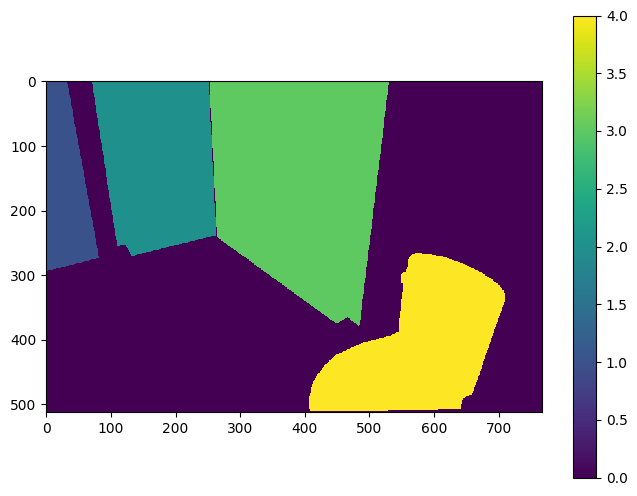

In [89]:
import numpy as np
import matplotlib.pyplot as plt


data = np.array(val[0]["annotation"])[:,:,1]
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()

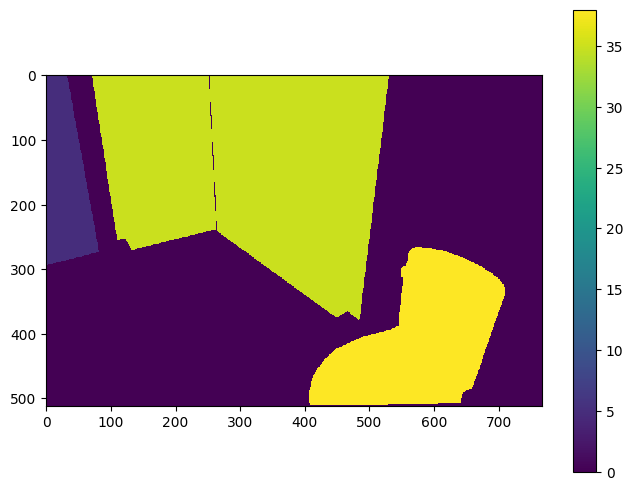

In [91]:
import numpy as np
import matplotlib.pyplot as plt


data = np.array(val[0]["annotation"])[:,:,0]
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap)
plt.show()